# Data Description 

This is the Gold dataset. The dataset gives you the information about a Gold prices based on several other stock prices as gives below  on which  you will have to analyze the gold price and build the machine learning model to predict the gold price  

# problem statement

For the purposes of proﬁtability, it is more important to predict the relative change in price tomorrow (i.e. whether the price will go up or down)
 Than to predict the absolute price tomorrow, so I have formulated this as a Regression  problem
 given historical price data up to a given day, my algorithm attempts to predict whether the gold price tomorrow will be higher or lower than it is today.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

---SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States. 

---The United States Oil Fund (USO) is an exchanged-traded product (ETP) that seeks to provide investment results corresponding to the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil.

---SLV is the symbol for the iShares Silver Trust ETF.

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r"C:\Users\kalim khan\Desktop\imarticus learning\kalim imarticus learning\projects\gold price prediction\gld_price_data.csv")

In [3]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

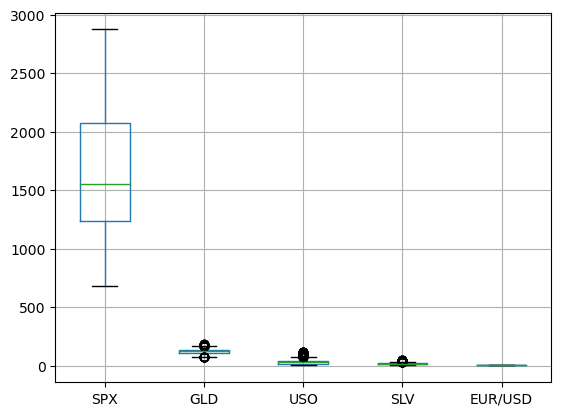

In [11]:
gold_data.boxplot()

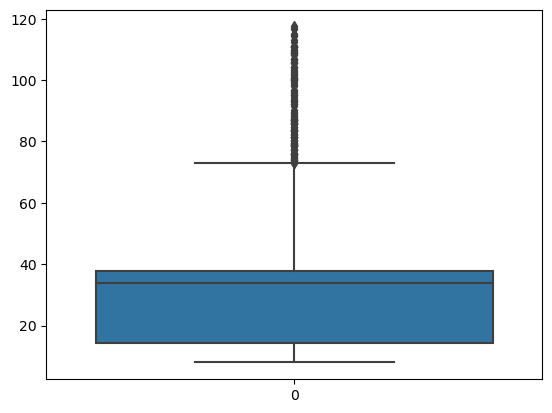

In [12]:
sns.boxplot(gold_data.USO)
plt.show()

In [13]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

In [14]:
day=pd.to_datetime(gold_data.Date,format = "%y/%m/%d",errors='ignore').dt.day

In [15]:
day

0        2
1        3
2        4
3        7
4        8
        ..
2285     8
2286     9
2287    10
2288    14
2289    16
Name: Date, Length: 2290, dtype: int64

In [16]:
gold_data['day']=day

In [17]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,8


In [18]:
gold_data['Month'] = pd.to_datetime(gold_data.Date,format = "%y/%m/%d",errors='ignore').dt.month

In [19]:
gold_data['Year'] = pd.to_datetime(gold_data.Date,format = "%y/%m/%d",errors='ignore').dt.year

In [20]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,3,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,4,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,7,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,8,1,2008
...,...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,8,5,2018
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,9,5,2018
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,10,5,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,14,5,2018


In [21]:
gold_data.drop('Date',axis=1,inplace=True)

In [22]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
2285,2671.919922,124.589996,14.0600,15.5100,1.186789,8,5,2018
2286,2697.790039,124.330002,14.3700,15.5300,1.184722,9,5,2018
2287,2723.070068,125.180000,14.4100,15.7400,1.191753,10,5,2018
2288,2730.129883,124.489998,14.3800,15.5600,1.193118,14,5,2018
2289,2725.780029,122.543800,14.4058,15.4542,1.182033,16,5,2018


Correlation:

1.Positive Correlation
2.Negative Correlation

In [23]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017,-0.001525,-0.023432,0.944403
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375,-0.000198,0.020494,0.206654
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317,-0.007988,-0.047335,-0.775765
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631,-0.000206,-0.011976,-0.172485
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000,0.002122,-0.012100,-0.791655
day,-0.001525,-0.000198,-0.007988,-0.000206,0.002122,1.000000,0.005550,-0.006307
Month,-0.023432,0.020494,-0.047335,-0.011976,-0.012100,0.005550,1.000000,-0.070903
Year,0.944403,0.206654,-0.775765,-0.172485,-0.791655,-0.006307,-0.070903,1.000000


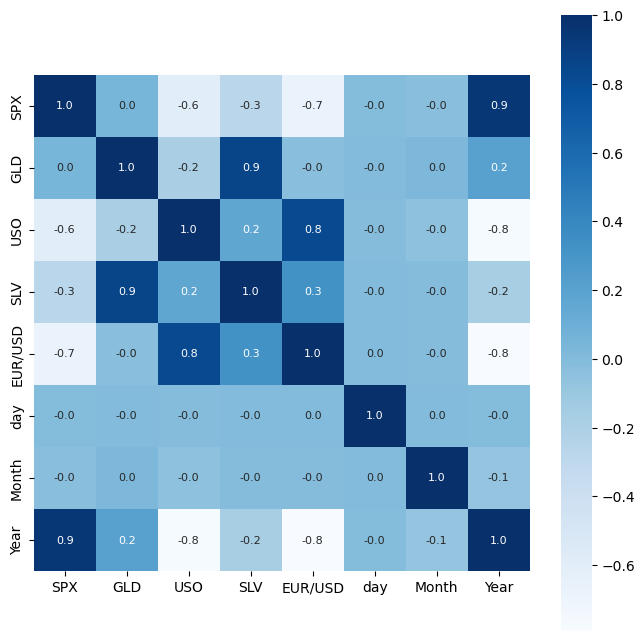

In [24]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [25]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
day       -0.000198
Month      0.020494
Year       0.206654
Name: GLD, dtype: float64


C:\Users\kalim khan\AppData\Local\Temp\ipykernel_18020\4061853779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


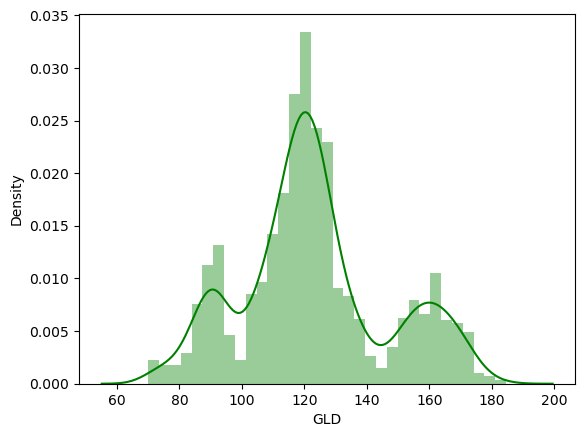

In [26]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
plt.show()

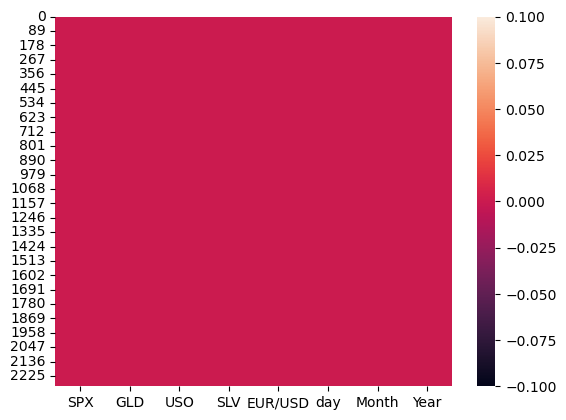

In [27]:
sns.heatmap(gold_data.isnull())
plt.show()

In [28]:
gold_data.duplicated().sum()

0

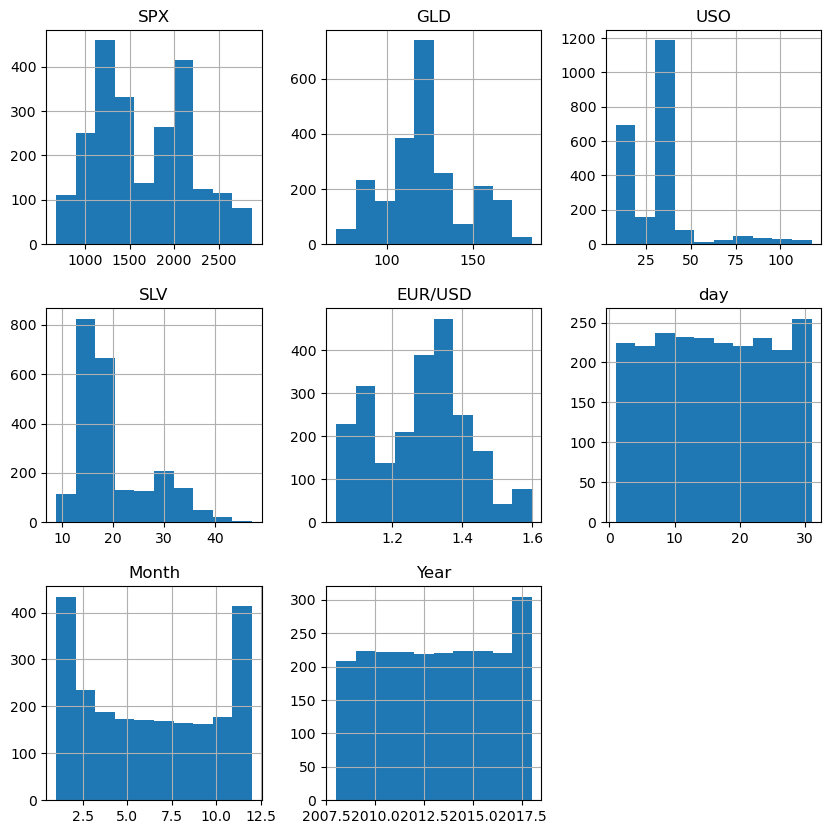

In [29]:
# Histogram of each feature
gold_data.hist(bins=10,figsize=(10,10))    
plt.show()

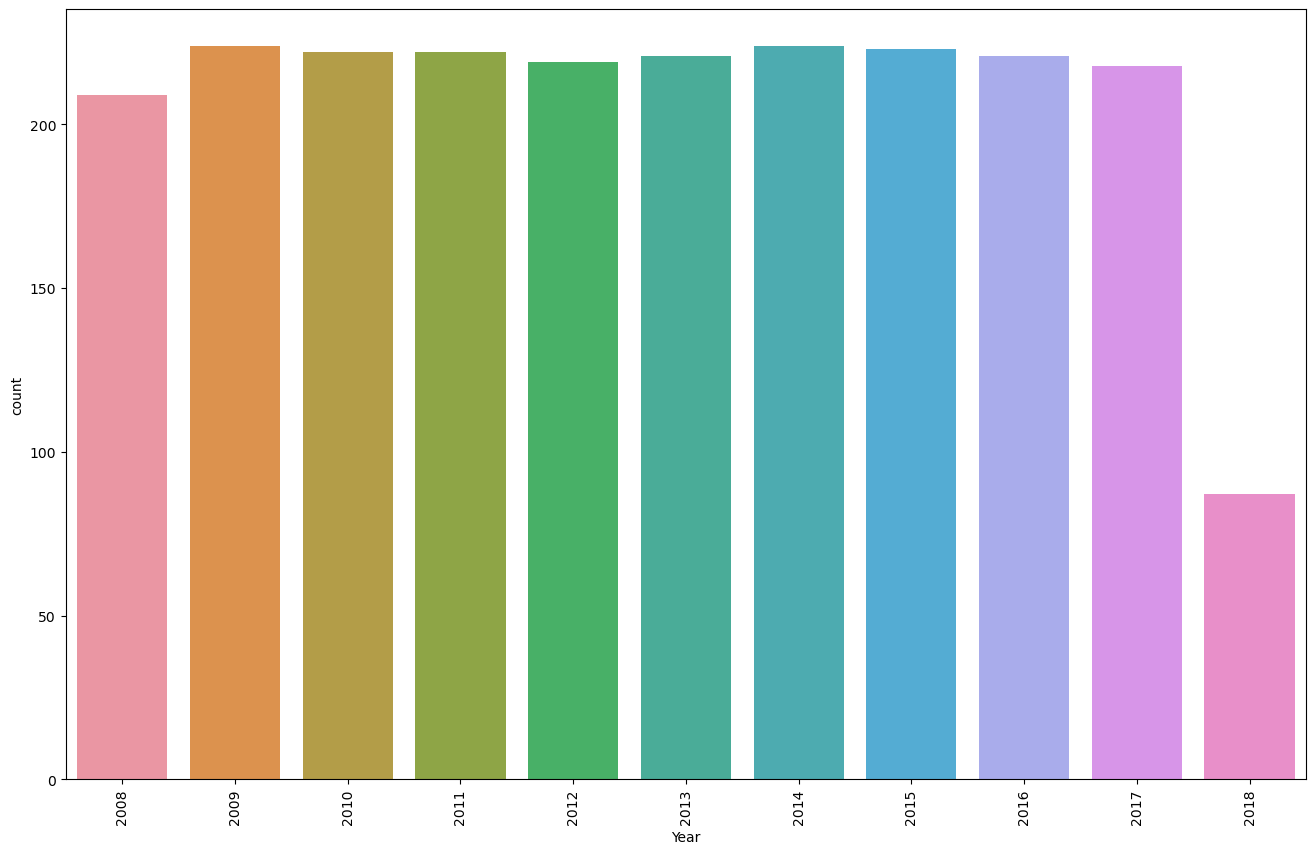

In [105]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='Year')
plt.xticks(rotation=90)
plt.show()

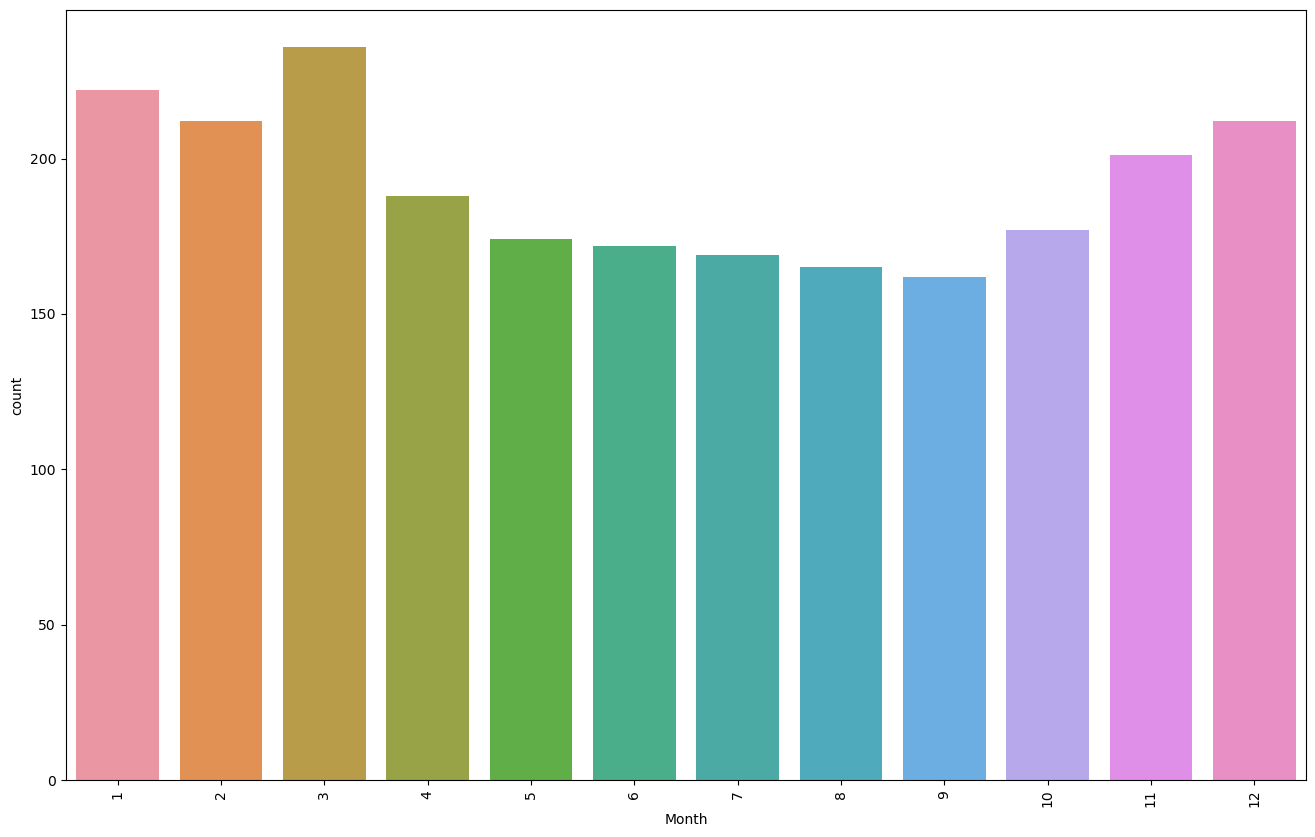

In [106]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='Month')
plt.xticks(rotation=90)
plt.show()

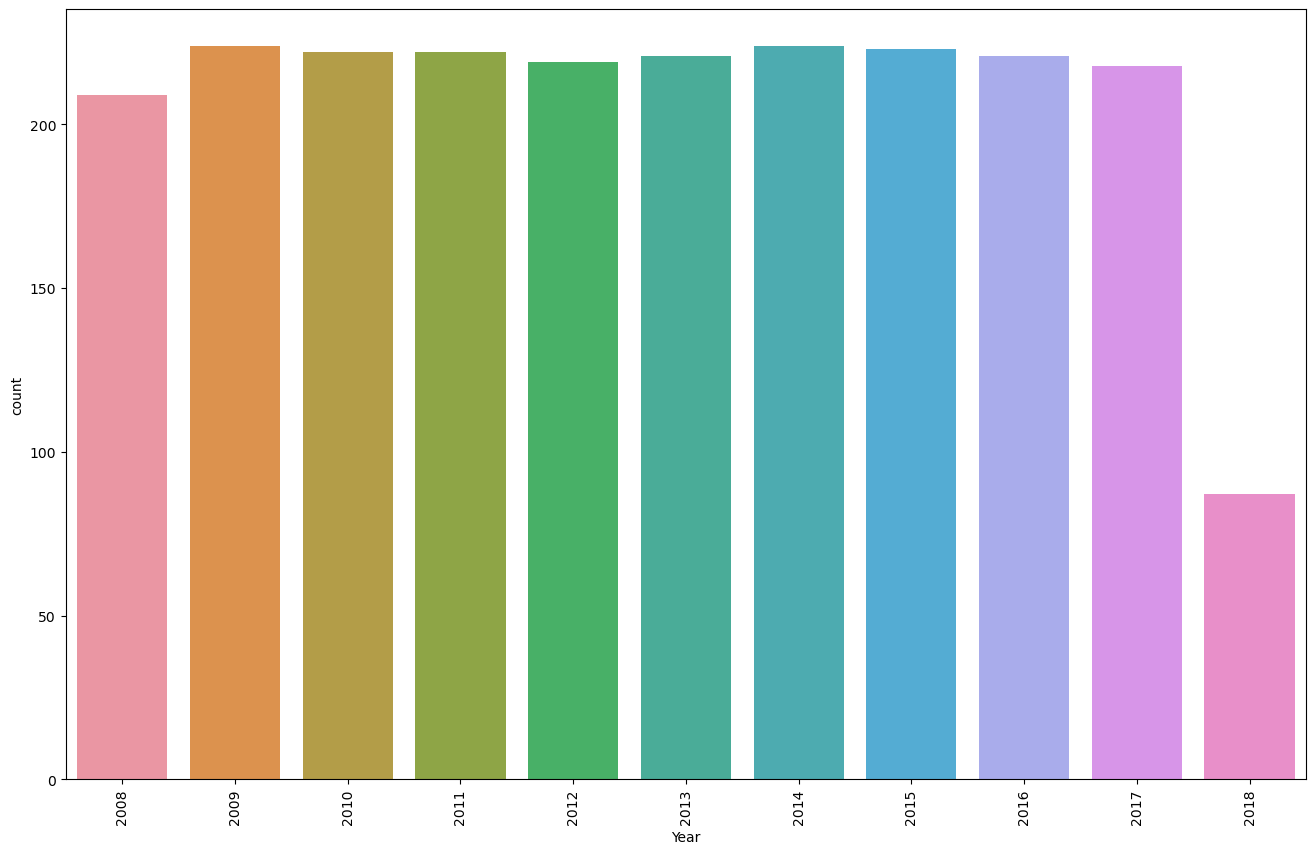

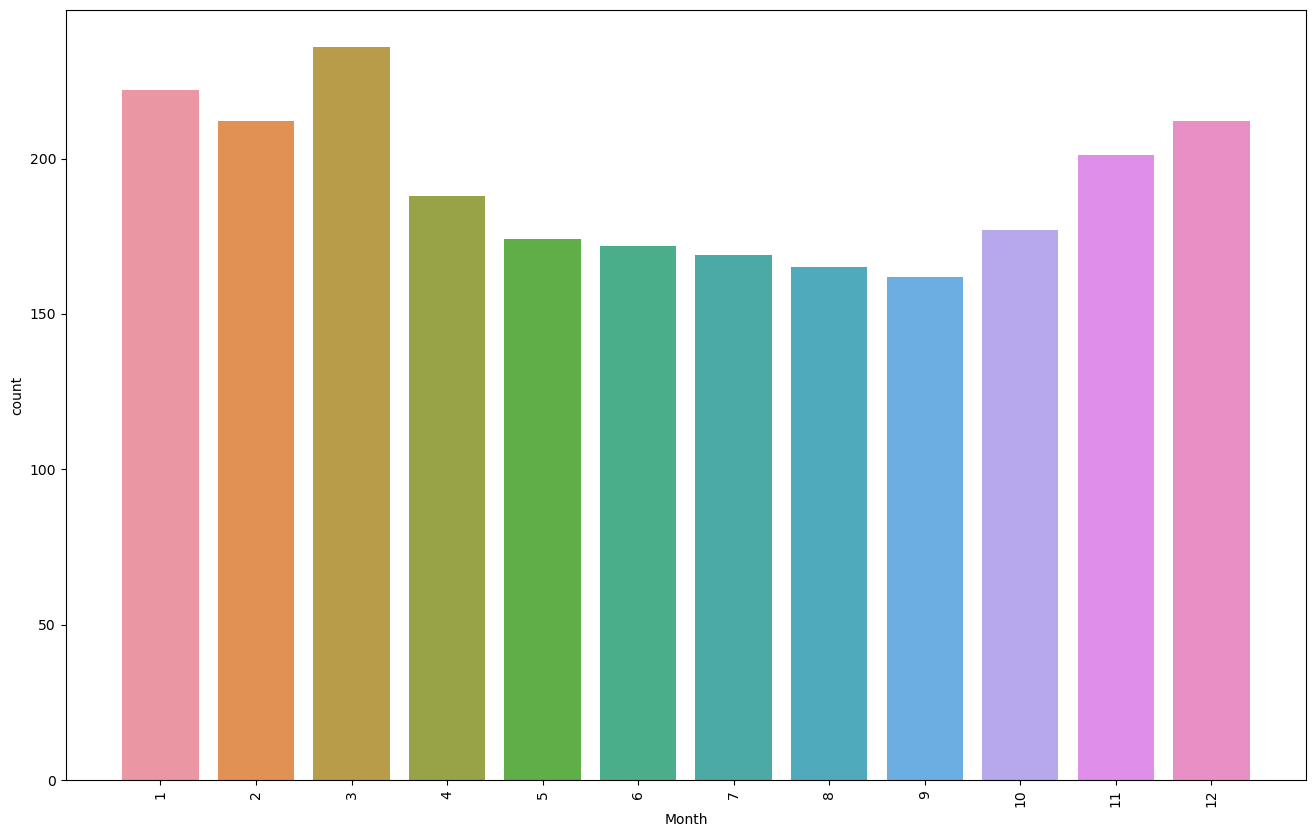

In [32]:
plt.plot(data=gold_data,X="Month")
plt.show()

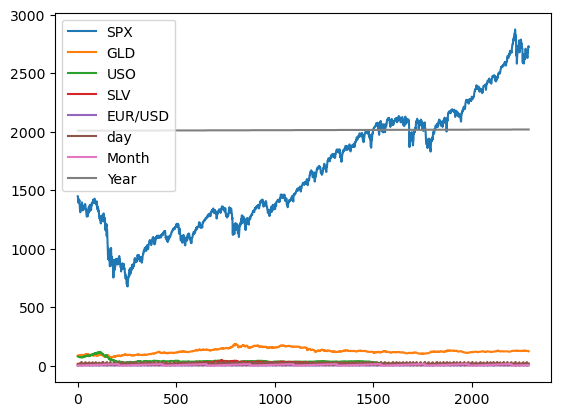

In [33]:
gold_data.plot()
plt.show()

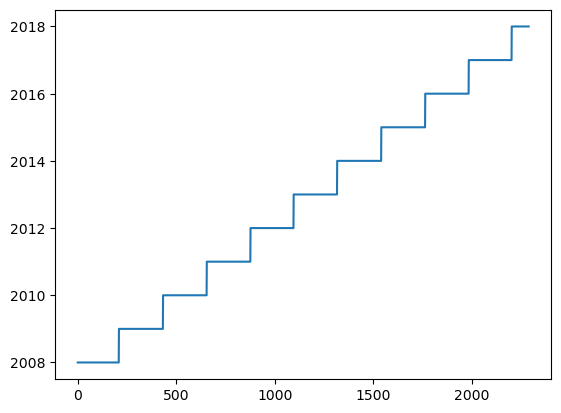

In [34]:
Year=gold_data.Year
Year.plot()
plt.show()

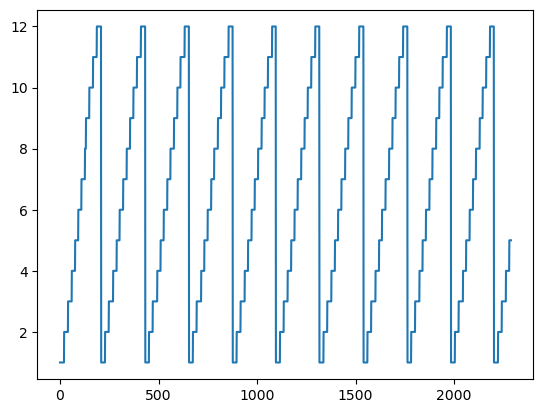

In [35]:
month=gold_data.Month
month.plot()
plt.show()

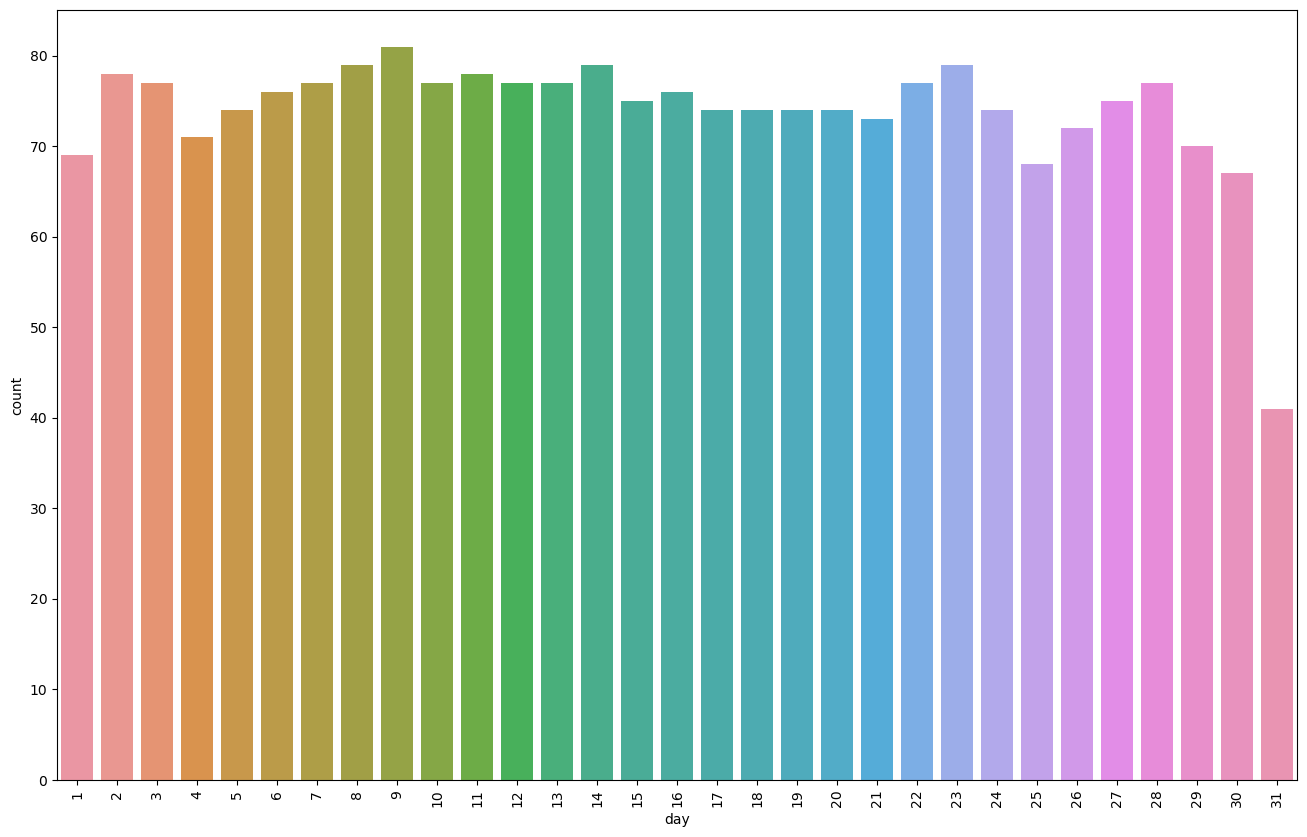

In [107]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='day')
plt.xticks(rotation=90)
plt.show()

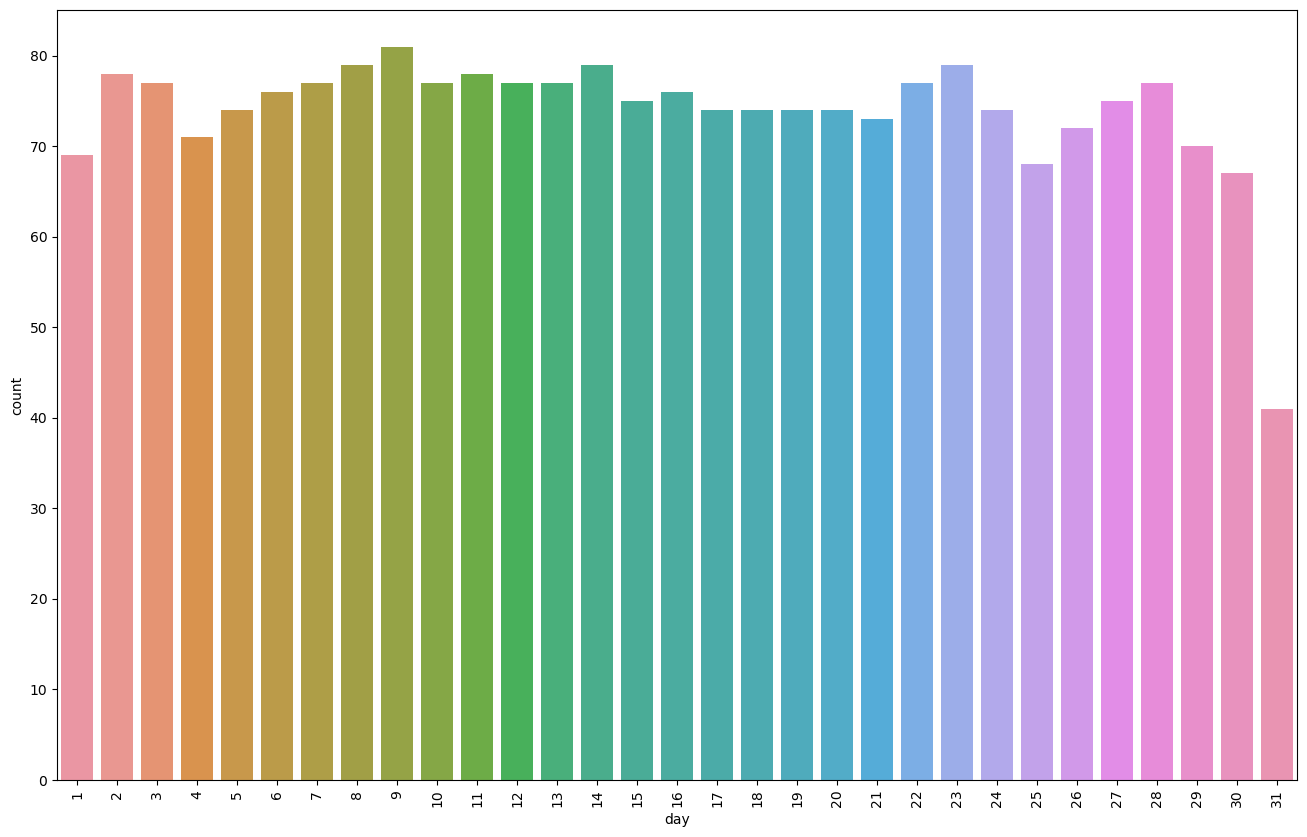

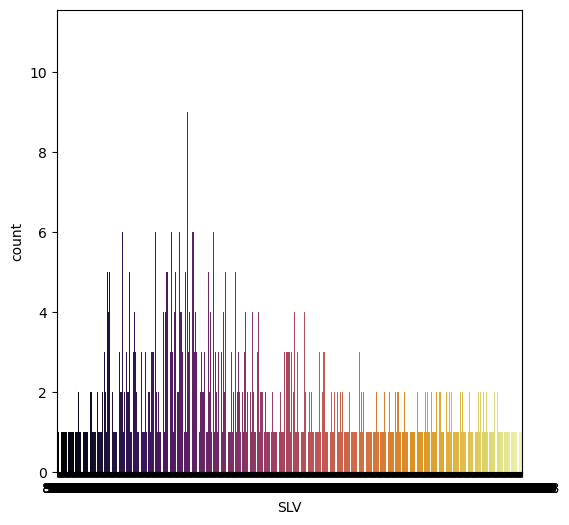

In [37]:
plt.figure(figsize = (6,6))
sns.countplot(data=gold_data,x='SLV', palette = 'inferno')
plt.show()

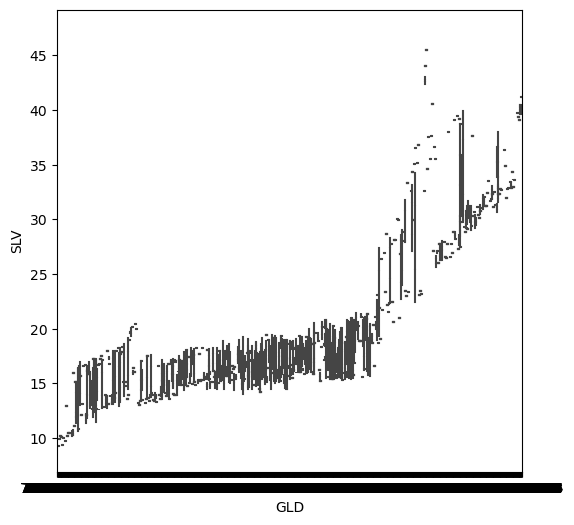

In [38]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'GLD', y = 'SLV',data = gold_data,orient='v')
plt.show()

In [39]:
gold_data.head(1)

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,1447.160034,84.860001,78.470001,15.18,1.471692,2,1,2008


# Splitting the Features and Target

In [40]:
X = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [41]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD  day  Month  Year
0     1447.160034  78.470001  15.1800  1.471692    2      1  2008
1     1447.160034  78.370003  15.2850  1.474491    3      1  2008
2     1411.630005  77.309998  15.1670  1.475492    4      1  2008
3     1416.180054  75.500000  15.0530  1.468299    7      1  2008
4     1390.189941  76.059998  15.5900  1.557099    8      1  2008
...           ...        ...      ...       ...  ...    ...   ...
2285  2671.919922  14.060000  15.5100  1.186789    8      5  2018
2286  2697.790039  14.370000  15.5300  1.184722    9      5  2018
2287  2723.070068  14.410000  15.7400  1.191753   10      5  2018
2288  2730.129883  14.380000  15.5600  1.193118   14      5  2018
2289  2725.780029  14.405800  15.4542  1.182033   16      5  2018

[2290 rows x 7 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.

# Splitting into Training data and Testing Data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape,X_test.shape)

(2290, 7) (1832, 7) (458, 7)


In [44]:
print(y.shape, y_train.shape,y_test.shape)

(2290,) (1832,) (458,)


# LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linreg = LinearRegression()

In [47]:
linreg.fit(X_train, y_train)

LinearRegression()

In [48]:
train_pred = linreg.predict(X_train)

In [49]:
train_pred

array([105.21076112, 121.35966468,  95.49111679, ..., 137.3881971 ,
       153.17897327, 111.16954366])

In [50]:
test_pred = linreg.predict(X_test)

In [51]:
test_pred

array([159.45210075,  85.57934697, 121.31420589, 128.88092346,
       124.60007501, 143.61030062, 161.46188815, 123.65584507,
       117.39524139, 125.95664306, 112.38092076, 176.12510374,
       135.82822746, 159.52084192, 113.81153062, 120.60450137,
       142.97421301, 160.81525815, 153.45040199, 162.62605548,
       147.60095402, 123.21958511, 180.50271568, 174.26061168,
       117.43191711,  97.75911073,  76.5952036 , 124.0669556 ,
       120.77630495, 161.32386954,  92.30629614, 121.74311436,
       100.01176188, 119.72285329, 110.57055946, 139.17690402,
       113.63723466, 118.54031472, 138.60786832, 112.16986569,
       101.13553329,  90.87240987, 122.56904643, 110.66799458,
       149.07382457, 121.78371826, 117.19659045, 114.9137796 ,
        93.6203288 , 126.24798031,  81.32053537, 112.18751729,
       125.61883858, 116.55718608, 119.40563769, 123.51214965,
       155.19562695, 179.44049224, 189.6697645 ,  87.94980796,
        90.56333106,  91.97081302,  94.3522995 , 115.73

In [52]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [53]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [54]:
x=gold_data[['SPX','USO','SLV','EUR/USD']]
scaledx = scale.fit_transform(x)
print(scaledx)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [55]:
mse_train = mean_squared_error(y_train,train_pred)
mse_train

47.25962680168415

In [56]:
mse_test = mean_squared_error(y_test,test_pred)
mse_test

55.28894085182572

In [57]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [58]:
print(rmse_test)
print(rmse_train)

7.435653357427693
6.874563753554414


In [59]:
r2_score(y_train,train_pred)*100

91.3357678633069

In [60]:
r2_score(y_test,test_pred)*100

89.51756144813376

### linear Regression  is over i got 91.33 of  accuracy for training data and for testing 89.51

# decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
DTR=DecisionTreeRegressor()

In [63]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
train_pred = DTR.predict(X_train)

In [65]:
train_pred

array([109.879997, 115.540001,  90.93    , ..., 129.869995, 159.429993,
       115.139999])

In [66]:
test_pred = DTR.predict(X_test)

In [67]:
test_pred

array([168.5     ,  80.93    , 113.830002, 127.779999, 119.18    ,
       155.669998, 147.630005, 126.559998, 117.639999, 125.620003,
       115.110001, 174.580002, 141.919998, 167.139999, 110.860001,
       119.650002, 135.039993, 171.320007, 159.570007, 174.979996,
       155.360001, 123.599998, 173.309998, 157.320007, 124.730003,
        94.239998,  73.080002, 118.300003, 118.519997, 167.559998,
        87.370003, 124.769997,  91.580002, 117.919998, 121.300003,
       135.410004, 114.360001, 115.32    , 134.119995, 108.410004,
       105.410004,  87.220001, 127.120003, 118.470001, 156.      ,
       120.699997, 107.980003, 107.839996,  93.040001, 127.019997,
        78.849998, 115.      , 120.739998, 111.760002, 118.919998,
       121.129997, 159.050003, 177.669998, 146.869995,  85.199997,
        93.800003,  86.879997,  88.989998, 120.589996, 126.139999,
       127.849998, 173.490005, 122.970001, 118.099998,  97.699997,
       170.130005, 141.899994, 130.990005, 119.489998, 123.32 

In [68]:
mse_train = mean_squared_error(y_train,train_pred)
mse_train

0.0

In [69]:
mse_train = mean_squared_error(y_test,test_pred)
mse_train

4.158563490684685

In [70]:
r2_score(y_train,train_pred)*100

100.0

In [71]:
r2_score(y_test,test_pred)*100

99.21156228382159

# Hyperparameters

In [72]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,20,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,50]

In [73]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
RSC=RandomizedSearchCV(DTR,param_distributions=decetion_grid,cv=4,random_state=10)

In [76]:
RSC

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [77]:
RSC.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [78]:
RSC.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'squared_error'}

In [79]:
DTR=DecisionTreeRegressor(criterion='squared_error',min_samples_split=10,min_samples_leaf=5,max_features='sqrt',max_depth=11)
DTR.fit(X_train,y_train)
train_pred = DTR.predict(X_train)
test_pred = DTR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

97.7569645542097
91.61409150056623


# Feature  selection Technic

In [80]:
from sklearn.ensemble import ExtraTreesRegressor

ETR = ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

In [81]:
print(ETR.feature_importances_)

[0.07322783 0.03915319 0.56512377 0.0180666  0.00114721 0.02854301
 0.27473839]


In [82]:
F_imp=pd.Series(ETR.feature_importances_,index=X.columns)

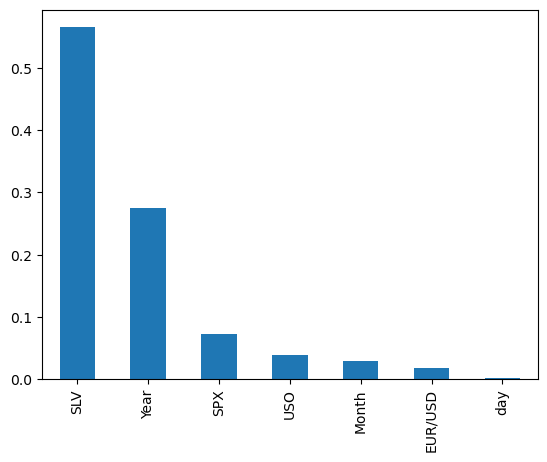

In [83]:
F_imp.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [84]:
X_imp = X[F_imp.nlargest(6).index]
X_imp

,SLV,Year,SPX,USO,Month,EUR/USD
0,15.1800,2008,1447.160034,78.470001,1,1.471692
1,15.2850,2008,1447.160034,78.370003,1,1.474491
2,15.1670,2008,1411.630005,77.309998,1,1.475492
3,15.0530,2008,1416.180054,75.500000,1,1.468299
4,15.5900,2008,1390.189941,76.059998,1,1.557099
...,...,...,...,...,...,...
2285,15.5100,2018,2671.919922,14.060000,5,1.186789
2286,15.5300,2018,2697.790039,14.370000,5,1.184722
2287,15.7400,2018,2723.070068,14.410000,5,1.191753
2288,15.5600,2018,2730.129883,14.380000,5,1.193118


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [86]:
DTR=DecisionTreeRegressor(criterion='squared_error',min_samples_split=10,min_samples_leaf=5,max_features='sqrt',max_depth=11)
DTR.fit(X_train,y_train)
train_pred = DTR.predict(X_train)
test_pred = DTR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.10000086252212
96.50881380124248


I have did decision Tree then I got accuray for Train and test(100.0 and 99.24761684108572) However 

I need to find Hyper tuning parameters accuracy for train and test(98.98725062462317 and 97.63352346143957) Then 

I wanted to do Feature  selection technic accuracy for Train and test(99.35443195217731 and 98.37415488846055)

from this  three technic i want take Feature selection  technic beacause It Has  gives me  the best accuracy for my data

# Hyperparameters

# Model Training: Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [89]:
RFR=RandomForestRegressor()

In [90]:
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.9411522160561
99.53097821080907


In [91]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = [ "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,20,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,50]

In [92]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}


In [93]:
RSC=RandomizedSearchCV(RFR,param_distributions=decetion_grid,cv=4,random_state=10)


In [94]:
RSC.fit(X_train,y_train)


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [95]:
RSC.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'squared_error'}

In [96]:
RFR=RandomForestRegressor(criterion='squared_error',max_features='log2',min_samples_leaf=1,min_samples_split=10,max_depth=17)
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.75387842913163
99.28761351726982


# Feature selection  technic

In [97]:
ETR = ExtraTreesRegressor()
ETR.fit(X,y)


ExtraTreesRegressor()

In [98]:
print(ETR.feature_importances_)

[0.07388564 0.06483924 0.56777738 0.02255839 0.00112389 0.0283949
 0.24142055]


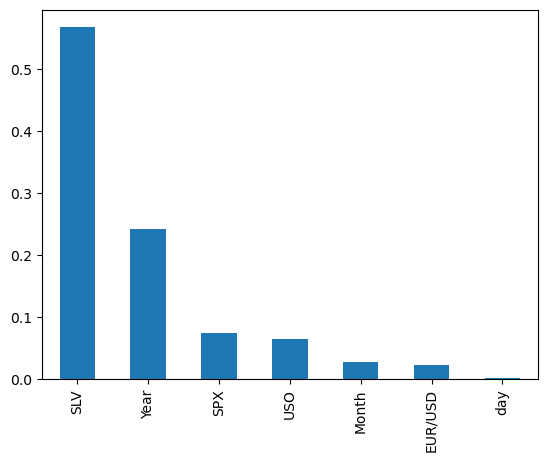

In [99]:

F_imp=pd.Series(ETR.feature_importances_,index=X.columns)
F_imp.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [100]:
X_imp = X[F_imp.nlargest(6).index]
X_imp

,SLV,Year,SPX,USO,Month,EUR/USD
0,15.1800,2008,1447.160034,78.470001,1,1.471692
1,15.2850,2008,1447.160034,78.370003,1,1.474491
2,15.1670,2008,1411.630005,77.309998,1,1.475492
3,15.0530,2008,1416.180054,75.500000,1,1.468299
4,15.5900,2008,1390.189941,76.059998,1,1.557099
...,...,...,...,...,...,...
2285,15.5100,2018,2671.919922,14.060000,5,1.186789
2286,15.5300,2018,2697.790039,14.370000,5,1.184722
2287,15.7400,2018,2723.070068,14.410000,5,1.191753
2288,15.5600,2018,2730.129883,14.380000,5,1.193118


In [101]:

X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [102]:
RFR=RandomForestRegressor(criterion='squared_error',max_features='log2',min_samples_leaf=1,min_samples_split=10,max_depth=17)
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.77299611554147
99.39651167371554


I have did random forset regressor  then I got accuracy for Train and test(99.94099893506171 99.51003569657718) However

I need to find Hyper tuning parameters accuracy for train and test(99.74166604721024 99.33820168385871)


I wanted to do Feature technic accuracy for Train and test(99.77348355109962 99.37277066774001)

For three technic i want take Feature technic beacause It  gives me best accuracy for my data

# CONCLUSION

**The Linear Regression model achieved an accuracy of 91.33 on the training data and 89.51% on the test data.**

**The Decision Tree model yielded high accuracy levels with 99.35% on the training data and 98.37% on the test data.**

**The Random Forest model obtained respectable accuracies of 99.77% on the training data and 99.37% on the test data.**



**In conclusion, the Random Forest model provides the best accuracy results, with a high testing accuracy of 99.77 for training and for testing 99.37%. This suggests that the Random Forest model is more likely to perform well on new, unseen data and is the most suitable choice among the three models for this specific problem.**

In [103]:
models = ["Linear Regression Train", "Linear Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [91.33, 89.51, 99.35,98.37, 99.77,99.37]

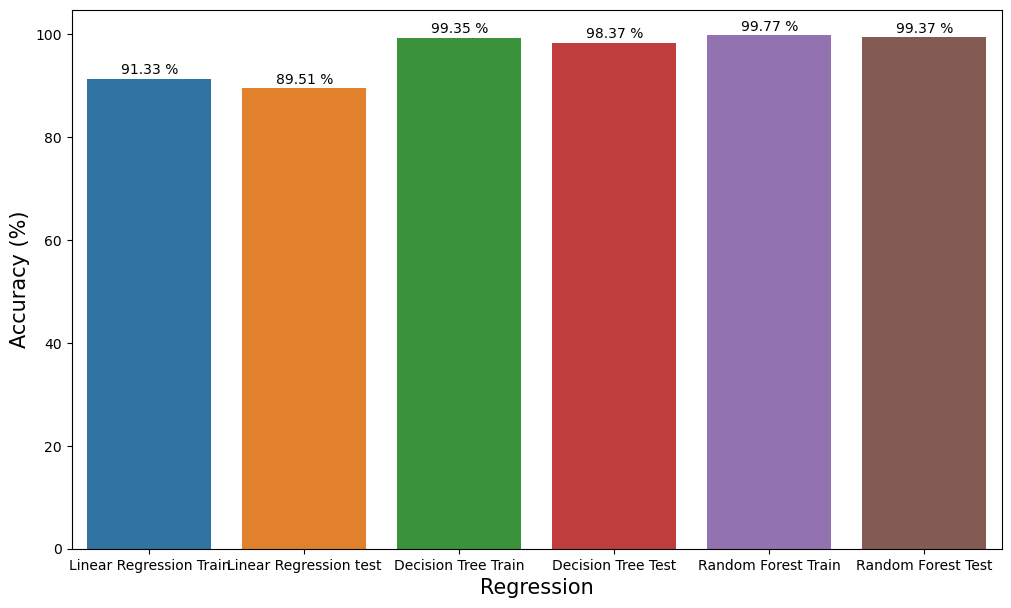

In [104]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Regression", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()